<a href="https://colab.research.google.com/github/ABHISHEKPRASAD16/EDAGoogleData/blob/main/googleappstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the important modules for our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df_store = pd.read_csv("googleplaystorevalues.csv")

In [15]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook...,ART_AND_DESIGN,4.7,933712,91.2M,"1,000,000+",Free,$4.29,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana (Modified),ART_AND_DESIGN,3.6,497219,2.2M,"1,000+",Free,$2.61,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,2.8,45949,31.4M,"500,000+",Free,$6.52,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint (Modified),ART_AND_DESIGN,1.3,577269,81.7M,"100,000+",Free,$1.94,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book (Modified),ART_AND_DESIGN,2.2,964194,24.8M,"5,000+",Free,$9.82,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
#print summary of our datasets
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [18]:
#Generate descriptive stastics of numerical column
df_store.describe()

,Rating
count,9367.000000
mean,4.191737
std,0.540328
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [19]:
df_store.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
10836,False
10837,False
10838,False
10839,False


In [20]:
# Handling Missing Values
df_store.dropna(inplace=True)  #Drop rows with missing values

# Dealing with duplicates
df_store.drop_duplicates(inplace=True) # Remove duplicates rows

In [21]:
df_store.duplicated().sum()

np.int64(0)

In [22]:
# Removing Outliers
z_scores = np.abs((df_store['Rating'] - df_store['Rating'].mean()) / df_store['Rating'].std())
df_store = df_store[z_scores < 3]  # Keep rows within 3 standard deviations

In [23]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8708 non-null   object 
 1   Category        8708 non-null   object 
 2   Rating          8708 non-null   float64
 3   Reviews         8708 non-null   object 
 4   Size            8708 non-null   object 
 5   Installs        8708 non-null   object 
 6   Type            8708 non-null   object 
 7   Price           8708 non-null   object 
 8   Content Rating  8708 non-null   object 
 9   Genres          8708 non-null   object 
 10  Last Updated    8708 non-null   object 
 11  Current Ver     8708 non-null   object 
 12  Android Ver     8708 non-null   object 
dtypes: float64(1), object(12)
memory usage: 952.4+ KB


In [24]:
# Change the data type of Installs column to numrical data type and remove the commma and the plus symbols:
df_store['Installs'] = df_store['Installs'].str.replace('+', '')  # Remove '+' sign
df_store['Installs'] = df_store['Installs'].str.replace(',', '')  # Remove ',' sign

df_store['Installs'] = df_store['Installs'].astype(int)  # Convert data type to int

# Change the data type of Reviews column to numrical data type:
df_store['Reviews'] = df_store['Reviews'].astype(int)  # Convert data type to int+

In [25]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook...,ART_AND_DESIGN,4.7,933712,91.2M,1000000,Free,$4.29,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana (Modified),ART_AND_DESIGN,3.6,497219,2.2M,1000,Free,$2.61,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,2.8,45949,31.4M,500000,Free,$6.52,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
8,Garden Coloring Book (Modified),ART_AND_DESIGN,4.3,850337,93.0M,1000000,Free,$1.66,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,1000000,Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up


Text(0.5, 1.0, 'Distribution of App Categories')

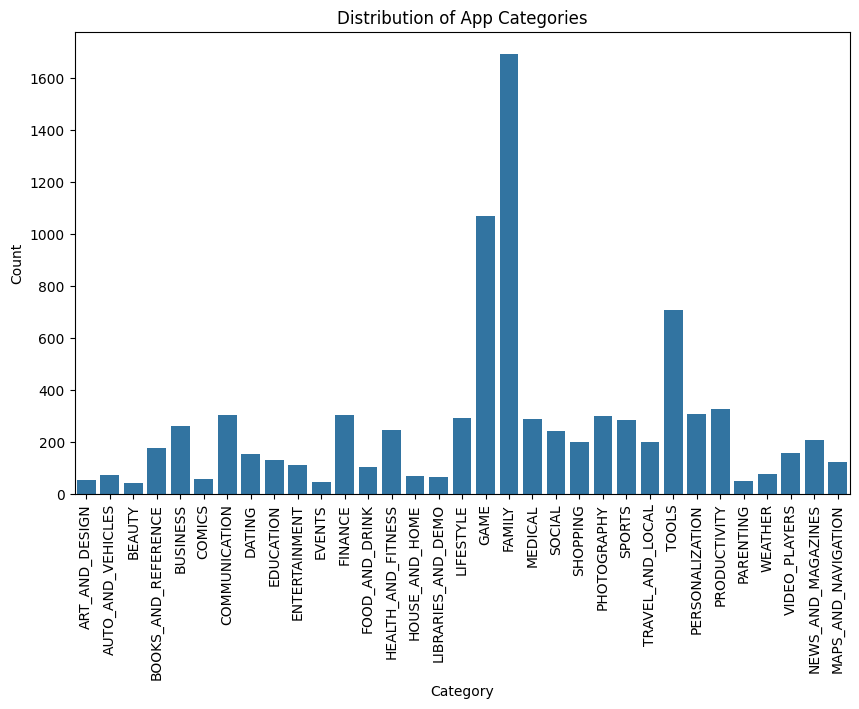

In [26]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_store, x='Category')
plt.xlabel('Category')
plt.xticks( rotation=90)
plt.ylabel('Count')
plt.title('Distribution of App Categories')

Text(0.5, 1.0, 'Relationship between Reviews and Rating')

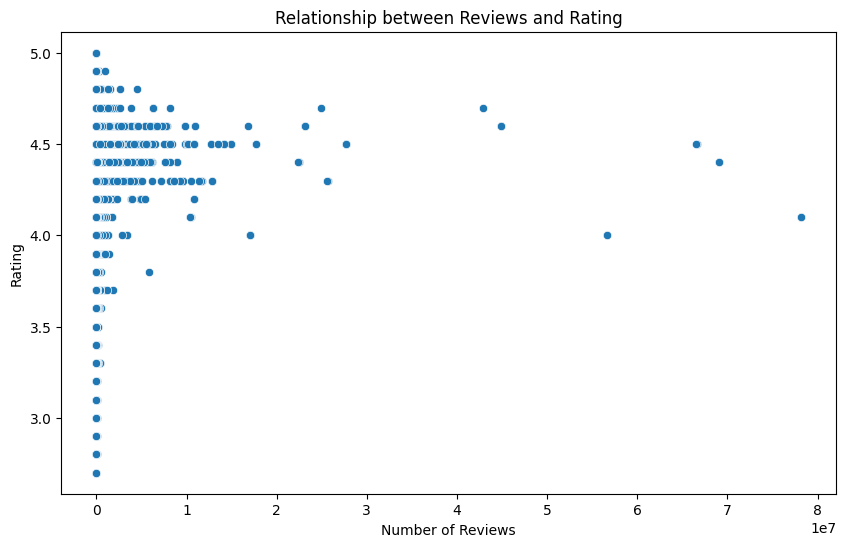

In [27]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_store, x='Reviews', y='Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Relationship between Reviews and Rating')

Text(0.5, 1.0, 'Distribution of Installs across Categories')

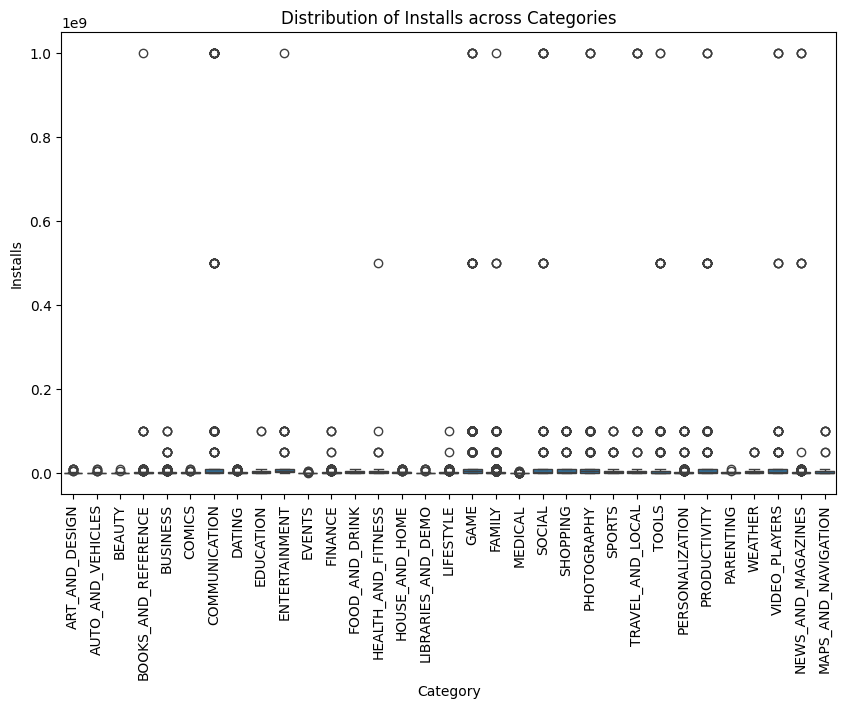

In [28]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_store, x='Category', y='Installs')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Distribution of Installs across Categories')

Text(0.5, 1.0, 'Distribution of Installs across Categories')

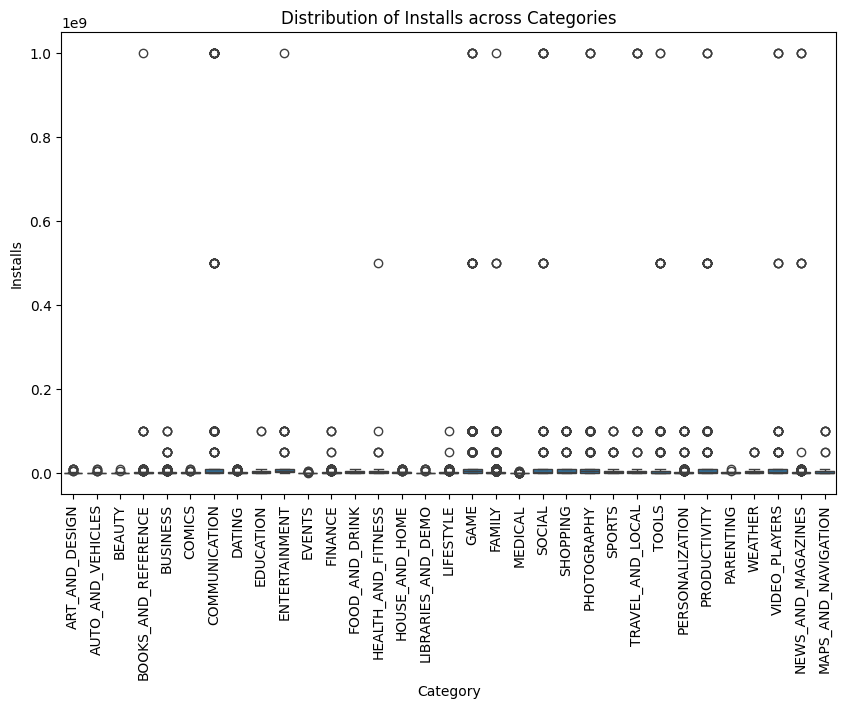

In [29]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_store, x='Category', y='Installs')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Distribution of Installs across Categories')

In [30]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook...,ART_AND_DESIGN,4.7,933712,91.2M,1000000,Free,$4.29,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana (Modified),ART_AND_DESIGN,3.6,497219,2.2M,1000,Free,$2.61,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,2.8,45949,31.4M,500000,Free,$6.52,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
8,Garden Coloring Book (Modified),ART_AND_DESIGN,4.3,850337,93.0M,1000000,Free,$1.66,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,1000000,Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up


In [33]:
from scipy.stats import ttest_ind

# Splitting the dataset into free and paid apps
free_apps = df_store[df_store['Type'] == 'Free']
paid_apps = df_store[df_store['Type'] == 'Paid']

In [34]:
# Performing t-test
t_stat, p_value = ttest_ind(free_apps['Rating'], paid_apps['Rating'])

In [35]:
p_value

np.float64(5.979524287722145e-06)

In [36]:
# Checking the p-value
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in ratings.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in ratings.")

Reject null hypothesis: There is a significant difference in ratings.


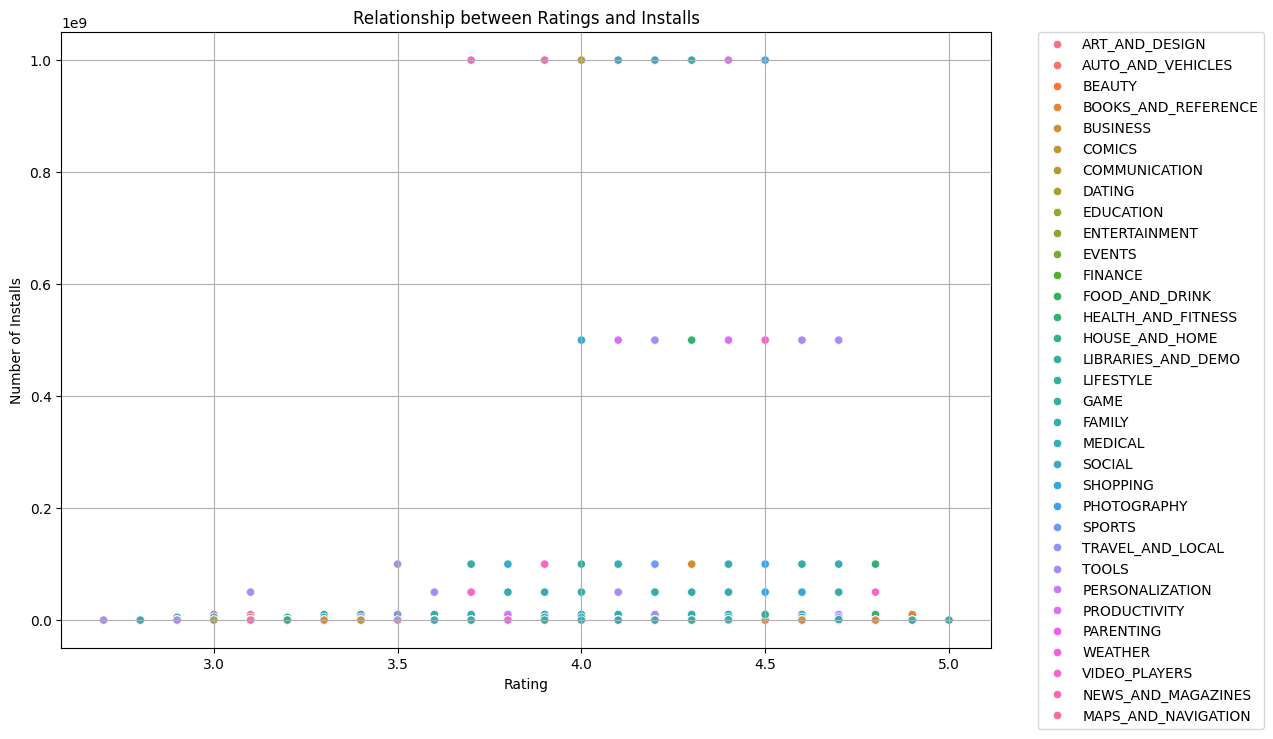

In [37]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_store, x='Rating', y='Installs', hue='Category')
plt.grid(True)
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.title('Relationship between Ratings and Installs')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Text(0.5, 1.0, 'Average Rating Trend over Time')

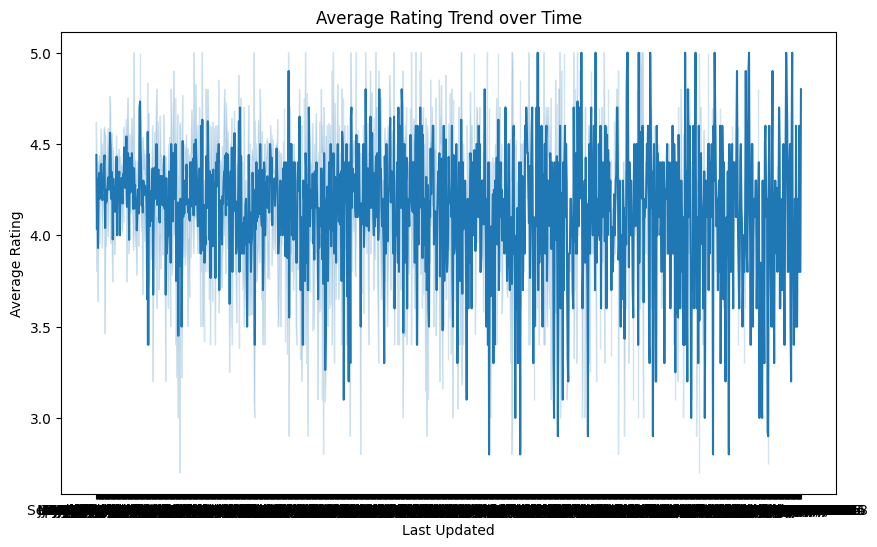

In [38]:
# Line plot of Average Rating over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_store, x='Last Updated', y='Rating')
plt.xlabel('Last Updated')
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over Time')

In [39]:
# Convert 'Last Updated' to datetime
df_store['Last Updated'] = pd.to_datetime(df_store['Last Updated'])

# Set 'Last Updated' as the index
df_store.set_index('Last Updated', inplace=True)

# Resample 'Rating' to monthly frequency
df_store_monthly = df_store['Rating'].resample('M').mean()

<ipython-input-39-107c884565cf>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_store_monthly = df_store['Rating'].resample('M').mean()


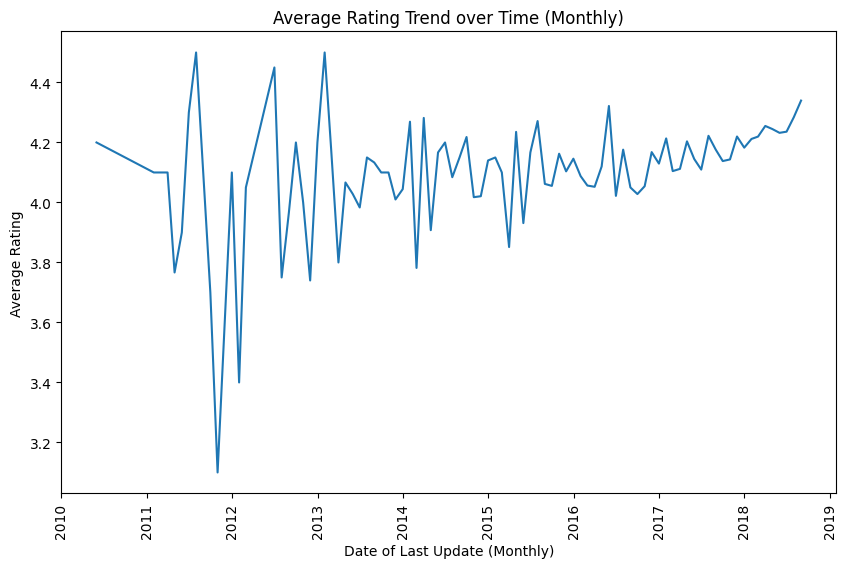

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_store_monthly)
plt.xlabel('Date of Last Update (Monthly)')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over Time (Monthly)')
plt.show()